# A short introduction to Numpy

Numpy provides a fast interface to operations on Numerical Arrays. It is the most basic component of any Python Scientific Computing Stack and, depending on the underlying BLAS implementation (more about BLAS later), parallelizes certain operations efficiently.

To get started we import Numpy.

In [1]:
import numpy as np

Below are some ways to create an array with Numpy.

In [2]:
a_random = np.random.rand(10) # A random array with 10 components
a_ones = np.ones((10, 10), dtype='float64') # A 10x10 matrix of ones, stored as double precision (float64) type
a_zeros = np.zeros(((10, 10, 10)), dtype='complex128') # A complex three dim. Tensor with all entries set to zero.
a_empty = np.empty(50, dtype='byte') # An unitialized byte array that can store 50 bytes.
a_range = np.arange(50) # The first 50 integers, starting at 0.

Accessing elements is easy.

In [3]:
a_random[0] # Element 0

0.4000953865562785

In [4]:
a_random[:2] # The first two elements 

array([0.40009539, 0.71934764])

In [5]:
a_random[-2:] # The last two elements

array([0.5445252, 0.4253604])

In [6]:
a_ones[:3, 2:5] # The third to fifth column in the first three rows

array([[1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.]])

In [7]:
a_zeros[3, 2, 1] # The element with indices (3, 2, 1)

0j

Assigning elements works similarly.

In [8]:
a_ones[3, 3] = 10
a_ones[:, 4] = np.arange(10)
a_ones[8] = 10 # This sets the whole of row 8 to the entry 10
print(a_ones)

[[ 1.  1.  1.  1.  0.  1.  1.  1.  1.  1.]
 [ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.]
 [ 1.  1.  1.  1.  2.  1.  1.  1.  1.  1.]
 [ 1.  1.  1. 10.  3.  1.  1.  1.  1.  1.]
 [ 1.  1.  1.  1.  4.  1.  1.  1.  1.  1.]
 [ 1.  1.  1.  1.  5.  1.  1.  1.  1.  1.]
 [ 1.  1.  1.  1.  6.  1.  1.  1.  1.  1.]
 [ 1.  1.  1.  1.  7.  1.  1.  1.  1.  1.]
 [10. 10. 10. 10. 10. 10. 10. 10. 10. 10.]
 [ 1.  1.  1.  1.  9.  1.  1.  1.  1.  1.]]


In [9]:
# Together with Matplotlib we can easily plot data.

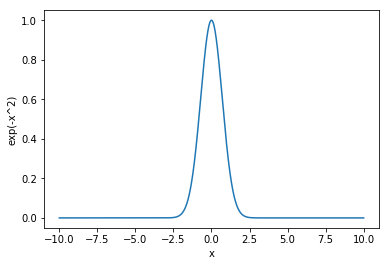

In [10]:
%matplotlib inline
from matplotlib import pyplot as plt

x = np.linspace(-10, 10, 10000)
y = np.exp(-x**2)
plt.plot(x, y)
plt.xlabel('x')
plt.ylabel('exp(-x^2)')
plt.show()

## BLAS Operations

[BLAS](http://www.netlib.org/blas/) (Basic Linear Algebra Subprograms) is an interface standard that defines access to a range of useful linear algebra routines on vectors and matrices. BLAS is designed in Fortan. For most CPUs efficient BLAS implementations are available. BLAS is split up into BLAS1, BLAS2, and BLAS3. BLAS1 describes simple vector operations of $O(n)$ cost. BLAS2 describes $O(n^2)$ operations such as the matrix-vector product, while BLAS3 focuses on $O(n^3)$ matrix-matrix operations (mainly matrix-matrix product). In particular, the matrix-matrix product benefits from efficient shared memory parallel implementations, and most vendors provide a corresponding multi-threaded BLAS implementation. Internally, Numpy makes use of BLAS. Hence, if Numpy was compiled with a fast BLAS library, it will also be very fast.

Matrix/Matrix and Matrix/vector products in Numpy are executed as follows:

In [13]:
A = np.random.randn(100, 100)
B = np.random.randn(100, 100)

C = A @ B # Product of the matrices A and B

Note that the componentwise product of two matrices is written as `C = A * B` and has nothing to do with the matrix/matrix product.

Numpy can also solve Linear systems of equations and perform other higher order matrix operations. These are implemented through interfacing the [LAPACK](www.netlib.org/lapack) library, which itself builds upon BLAS. Many vendors combine LAPACK and BLAS into a single library.

To solve a linear system of equations, the following can be used.

In [15]:
A = np.random.rand(1000, 1000)
b = np.random.rand(1000)
x = np.linalg.solve(A, b)

We can easily compute the relative residual of this solve as

In [16]:
residual = np.linalg.norm(b - A.dot(x)) / (np.linalg.norm(A) * np.linalg.norm(b))
print(residual)

2.526337092894249e-16


The system was solved with an accuracy close to machine precision.